In [8]:
import os
import csv

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/home/jovyan/work/github/thelayoff/notebooks'

In [6]:
data_dir = "/home/jovyan/work/Dropbox/thelayoff"
input_file = os.path.join(data_dir, "all_posts.txt")

In [82]:
total_posts = 0
total_replies = 0
company_posts = Counter()
company_words = Counter()

with open(input_file) as file:
    rd = csv.reader(file, delimiter = "\t", quotechar = '"')
    for row in tqdm(rd):
        
        text = row[4]
        tokens = text.split(" ")
        n_tokens = len(tokens)
        
        company = row[1]
        
        try:
            n_replies = int(row[3])
        except:
            n_replies = 0
        
        # update counters
        total_posts += 1
        total_replies += n_replies
        company_posts.update(company.split())
        company_words[company] += n_tokens

250837it [00:14, 17222.50it/s]


In [83]:
company_posts.most_common(10)

[('https://www.thelayoff.com/corinthian-colleges', 9206),
 ('https://www.thelayoff.com/at-and-t', 8712),
 ('https://www.thelayoff.com/qualcomm', 8599),
 ('https://www.thelayoff.com/intel', 7674),
 ('https://www.thelayoff.com/university-phoenix', 6646),
 ('https://www.thelayoff.com/verizon-communications', 5845),
 ('https://www.thelayoff.com/baker-hughes', 4992),
 ('https://www.thelayoff.com/chesapeake-energy', 4975),
 ('https://www.thelayoff.com/sears-holdings', 4637),
 ('https://www.thelayoff.com/sams-club', 4230)]

In [84]:
company_words.most_common(10)

[('https://www.thelayoff.com/at-and-t', 2690462),
 ('https://www.thelayoff.com/chevron', 1684027),
 ('https://www.thelayoff.com/intel', 1612527),
 ('https://www.thelayoff.com/verizon-communications', 1596111),
 ('https://www.thelayoff.com/corinthian-colleges', 1398768),
 ('https://www.thelayoff.com/qualcomm', 1378728),
 ('https://www.thelayoff.com/sams-club', 1182336),
 ('https://www.thelayoff.com/sears-holdings', 1140477),
 ('https://www.thelayoff.com/honeywell-international', 984544),
 ('https://www.thelayoff.com/wells-fargo-and', 942625)]

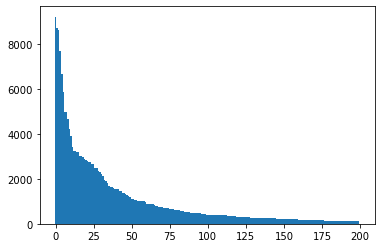

In [62]:
labels, values = zip(*company_posts.most_common(200))
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.show()

In [88]:
n_10_or_more = 0
for count in company_posts.values():
    if count > 10:
        n_10_or_more += 1
n_10_or_more

981

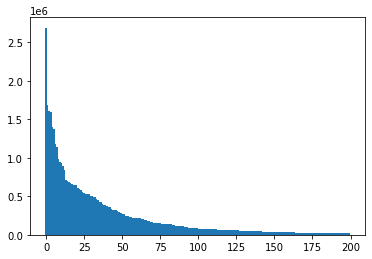

In [87]:
labels, values = zip(*company_words.most_common(200))
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.show()

In [93]:
n_100_or_more = 0
for count in company_words.values():
    if count > 100:
        n_100_or_more += 1
n_100_or_more

2417